# 🧪 Prédiction de fertilisants – Kaggle Challenge
**Auteur** : Arnaud Chéridi
📅 Date : Juin 2025
📍 Compétition : [Playground Series - Season 3, Episode 16](https://www.kaggle.com/competitions/playground-series-s3e16)
🎯 Objectif : Prédire les 3 fertilisants les plus probables à partir de données agronomiques synthétiques.

---

# Analyse exploratoire des données (EDA)

Ce notebook explore les données fournies dans le cadre de la compétition Kaggle. L’objectif est d’identifier les variables pertinentes, détecter les valeurs manquantes et préparer le jeu de données pour la modélisation.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## Chargement des données et aperçu général

In [2]:
df = pd.read_csv('data/train.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               750000 non-null  int64 
 1   Temparature      750000 non-null  int64 
 2   Humidity         750000 non-null  int64 
 3   Moisture         750000 non-null  int64 
 4   Soil Type        750000 non-null  object
 5   Crop Type        750000 non-null  object
 6   Nitrogen         750000 non-null  int64 
 7   Potassium        750000 non-null  int64 
 8   Phosphorous      750000 non-null  int64 
 9   Fertilizer Name  750000 non-null  object
dtypes: int64(7), object(3)
memory usage: 57.2+ MB


In [8]:
df.describe()

,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,31.503565,61.038912,45.184147,23.093808,9.478296,21.073227
std,216506.495284,4.025574,6.647695,11.794594,11.216125,5.765622,12.346831
min,0.000000,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,187499.750000,28.000000,55.000000,35.000000,13.000000,4.000000,10.000000
50%,374999.500000,32.000000,61.000000,45.000000,23.000000,9.000000,21.000000
75%,562499.250000,35.000000,67.000000,55.000000,33.000000,14.000000,32.000000
max,749999.000000,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [12]:
df.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP


## Analyse univariée et bivariée

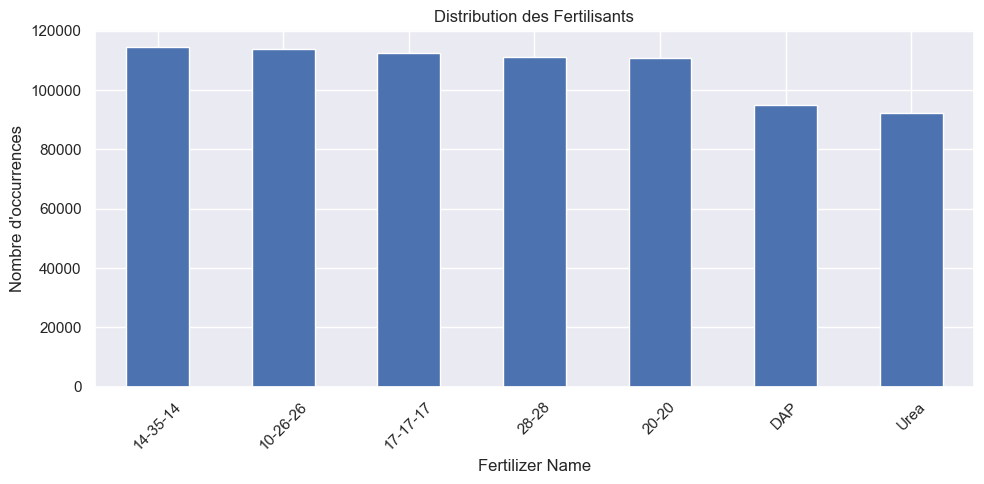

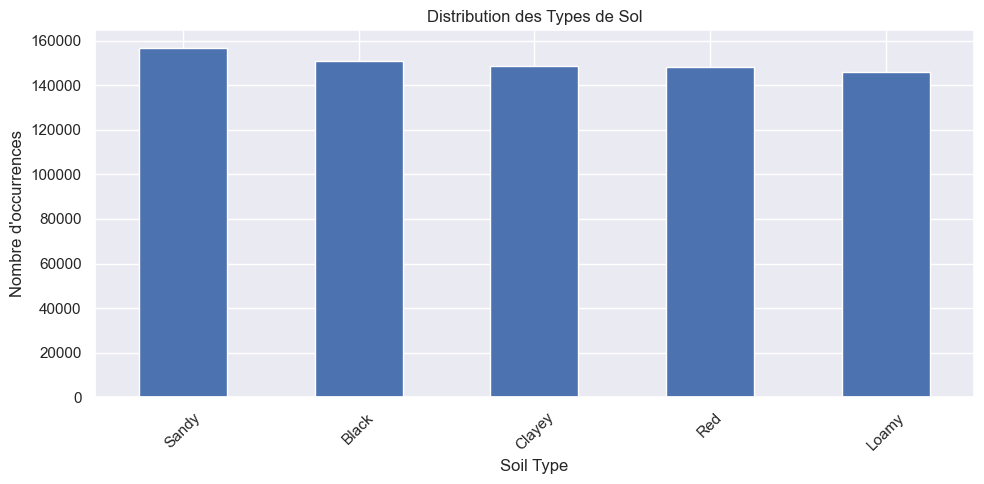

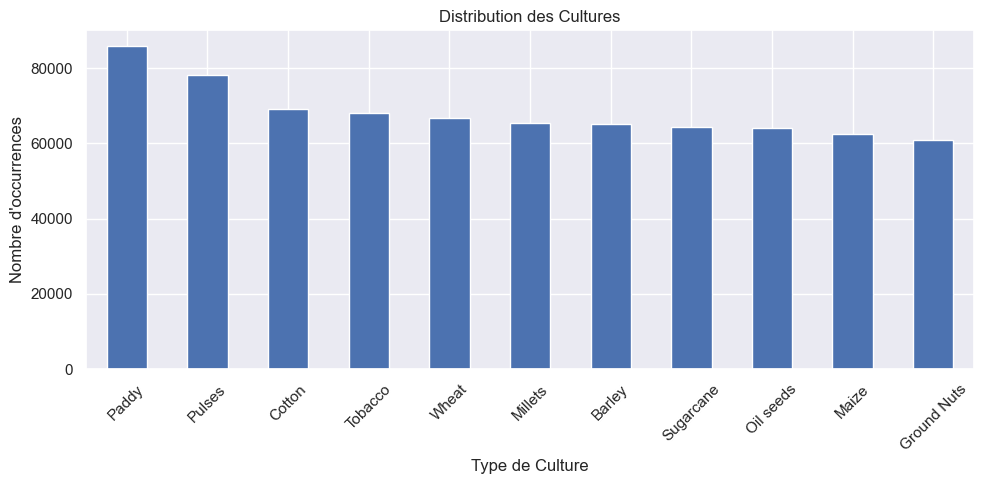

In [16]:
plt.figure(figsize=(10, 5))
df['Fertilizer Name'].value_counts().plot(kind='bar')
plt.title('Distribution des Fertilisants')
plt.xlabel('Fertilizer Name')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
df['Soil Type'].value_counts().plot(kind='bar')
plt.title('Distribution des Types de Sol')
plt.xlabel('Soil Type')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
df['Crop Type'].value_counts().plot(kind='bar')
plt.title('Distribution des Cultures')
plt.xlabel('Type de Culture')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

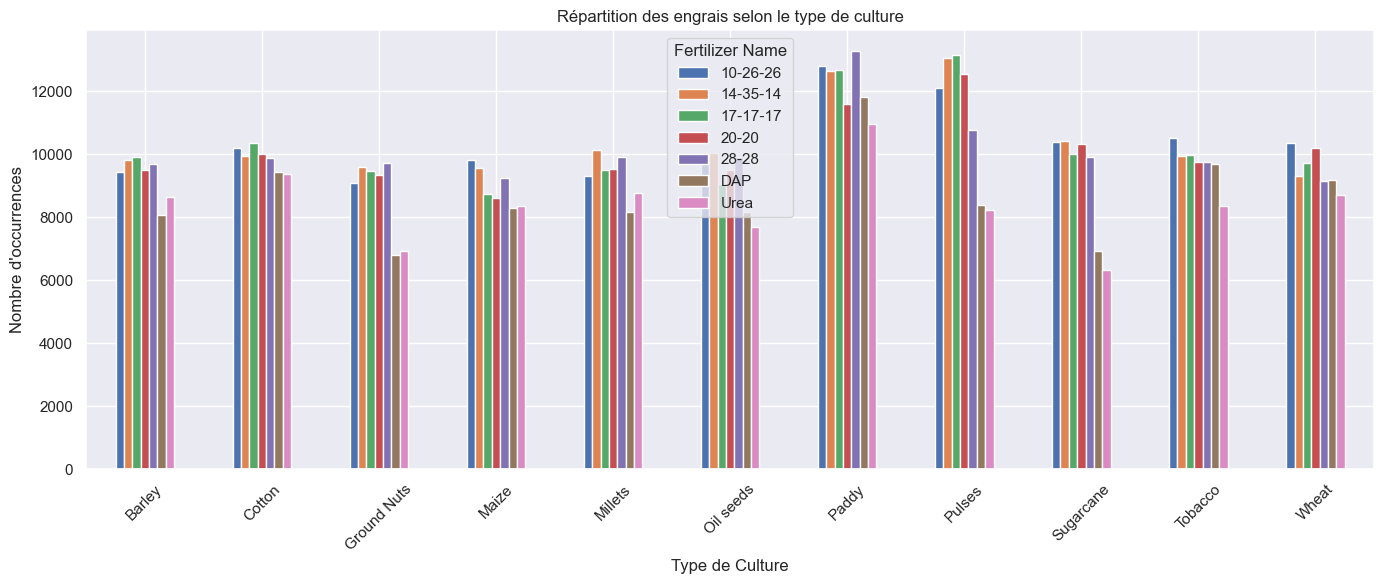

<Figure size 1400x600 with 0 Axes>

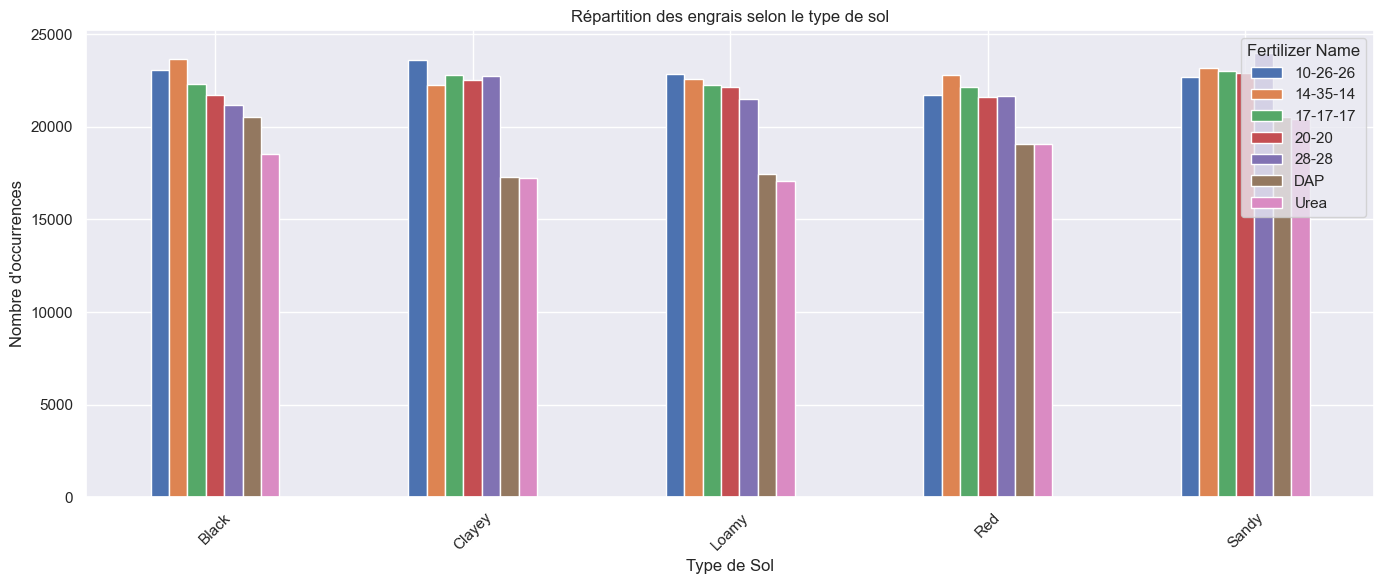

In [18]:
plt.figure(figsize=(14, 6))
grouped_crop = df.groupby(['Crop Type', 'Fertilizer Name']).size().unstack().fillna(0)
grouped_crop.plot(kind='bar', stacked=False, figsize=(14,6))
plt.title("Répartition des engrais selon le type de culture")
plt.xlabel("Type de Culture")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45)
plt.legend(title="Fertilizer Name")
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
grouped_soil = df.groupby(['Soil Type', 'Fertilizer Name']).size().unstack().fillna(0)
grouped_soil.plot(kind='bar', stacked=False, figsize=(14,6))
plt.title("Répartition des engrais selon le type de sol")
plt.xlabel("Type de Sol")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45)
plt.legend(title="Fertilizer Name")
plt.tight_layout()
plt.show()

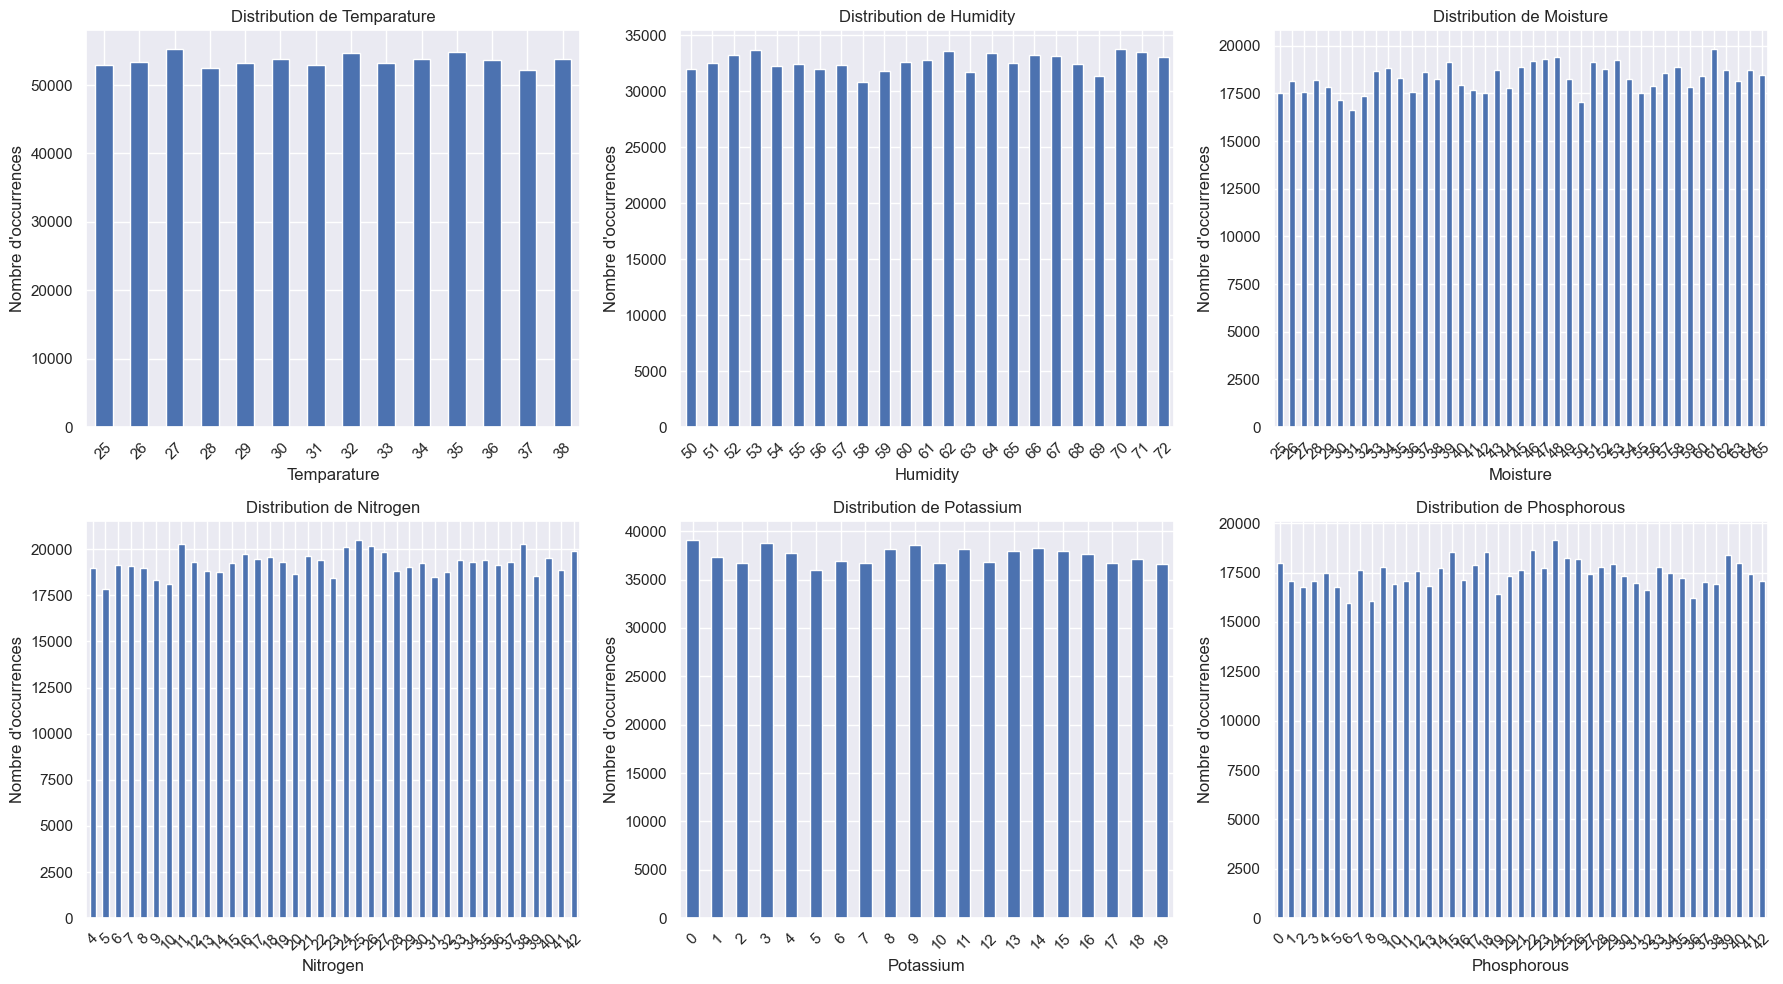

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
features = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']

for ax, feature in zip(axes.flatten(), features):
    df[feature].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title(f'Distribution de {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel("Nombre d'occurrences")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

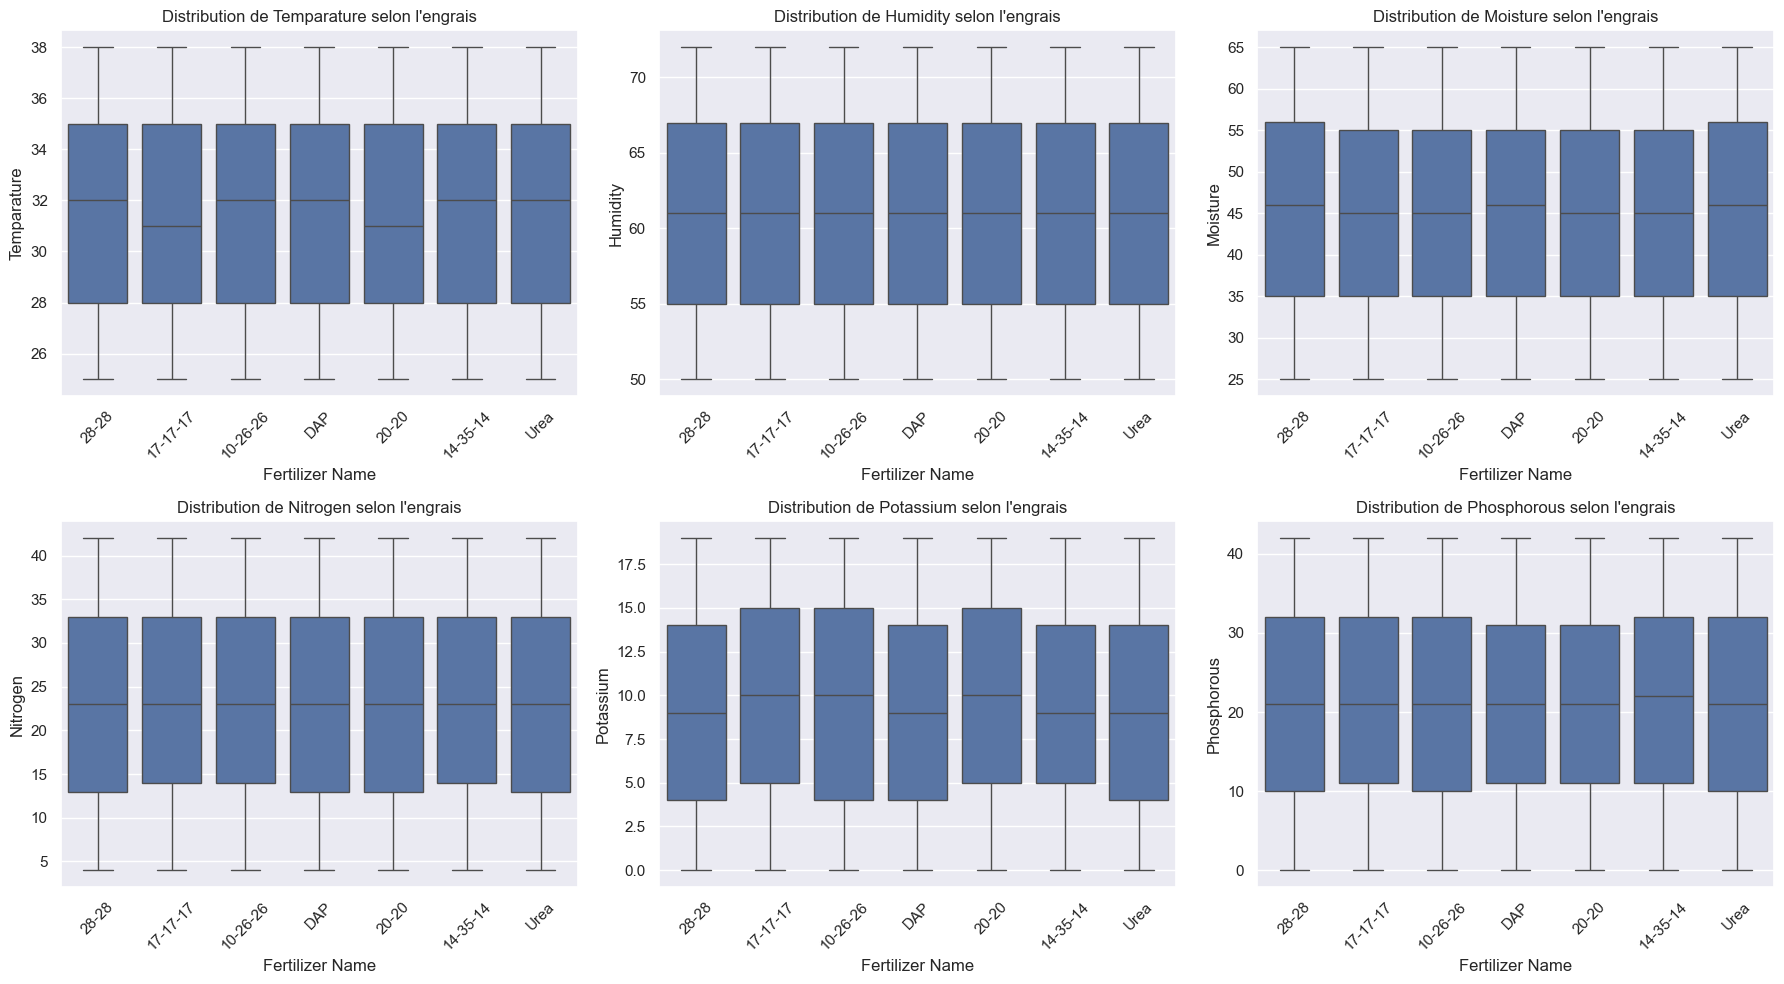

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
features = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']

for ax, feature in zip(axes.flatten(), features):
    sns.boxplot(x='Fertilizer Name', y=feature, data=df, ax=ax)
    ax.set_title(f'Distribution de {feature} selon l\'engrais')
    ax.set_xlabel('Fertilizer Name')
    ax.set_ylabel(feature)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [25]:
test = pd.read_csv('data/test.csv')

soil_train = set(df['Soil Type'].unique())
soil_test = set(test['Soil Type'].unique())

crop_train = set(df['Crop Type'].unique())
crop_test = set(test['Crop Type'].unique())

new_soil_types = soil_test - soil_train
new_crop_types = crop_test - crop_train

print("Nouveaux types de sol dans le test :", new_soil_types)
print("Nouveaux types de culture dans le test :", new_crop_types)

Nouveaux types de sol dans le test : set()
Nouveaux types de culture dans le test : set()


## Analyse et remarques

À l’issue de cette analyse exploratoire, plusieurs constats s’imposent :

- Les différentes figures montrent que les **données sont globalement stables**, sans tendance marquée ni rupture visible dans le temps ou entre les classes.
- Aucune **corrélation évidente** ne se dégage entre les variables explicatives et la variable cible, ce qui suggère un **problème de séparabilité** dans l’espace des features actuelles.
- La distribution de plusieurs variables semble **relativement uniforme ou peu informative**, ce qui peut nuire à la performance des modèles.

Ces observations suggèrent que la performance pourrait être **limitée par la représentation actuelle des données**. Une étape d’**ingénierie de features**, basée sur une meilleure compréhension du contexte métier, aurait pu permettre de construire des variables plus prédictives (par exemple des ratios, des interactions ou des agrégations temporelles).

Sans transformation supplémentaire, les modèles risquent d’apprendre peu d'information utile, ce qui souligne l’importance cruciale du **feature engineering** dans ce type de problématique.